# Investment Analysis Assignment

## Checkpoint 1: Data Cleaning 1
### Create dataframe companies for data in companies.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create dataframe companies for data in companies.txt
companies = pd.read_csv('companies.txt', encoding = "ISO-8859-1", delimiter="\t")
companies.head()

permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code                 region           city  founded_at  
0         16                 Mumbai         Mumbai         NaN  
1         DE             DE - Other  Delaware City  04-09-2014  
2        NaN                    NaN            NaN         NaN  
3         22                Beijing        Beijing  01-01-2007  
4         IL  Springfield, Illinois      Champaign  01-01-2010

### Create dataframe rounds2 for data in companies.txt

In [2]:
# Create dataframe rounds2 for data in rounds2.csv
rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")
rounds2.head()

company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008          2000000.0

### Unique comapnies present in round2

#### Remove NaN/Null entries for raised_amount_usd from rounds2.

In [3]:
pd.options.display.float_format = '{:.2f}'.format
rounds2 = rounds2[np.isfinite(rounds2['raised_amount_usd'])]
rounds2.head()

company_permalink  \
0                  /organization/-fame   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   
6     /organization/01games-technology   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
6  /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015        10000000.00  
2                NaN  01-03-2014          700000.00  
3                  B  30-01-2014         3406878.00  
4                  A  19-03-2008         2000000.00  
6                NaN  01-07-2014           41250.00

In [4]:

# Total number of Unique entry in rounds2 DF
len(set(rounds2.company_permalink.str.lower()))


53915

In [5]:
# Total number of Unique entry in companies DF
len(set(companies.permalink.str.lower()))

66368

In [6]:
set(rounds2.company_permalink.str.lower()) - set(rounds2.company_permalink.str.lower())

set()

#### Column that can be used as the unique key for each company

In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


### Thus companies permalink is unique in each row and can be used for Key

### Merge the two data frames so that all variables (columns)  in the companies frame are added to the rounds2 data frame.
### Convert companies_permalink in rounds2 to lower case.

In [8]:
def str_to_lower(string):
    return string.lower()
ds = rounds2.company_permalink.apply(str_to_lower)
rounds2['company_permalink'] = ds.values

In [9]:
rounds2.head()

company_permalink  \
0                  /organization/-fame   
2               /organization/-qounter   
3  /organization/-the-one-of-them-inc-   
4                /organization/0-6-com   
6     /organization/01games-technology   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
6  /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015        10000000.00  
2                NaN  01-03-2014          700000.00  
3                  B  30-01-2014         3406878.00  
4                  A  19-03-2008         2000000.00  
6                NaN  01-07-2014           41250.00

### Convert permalink in companies to lower case.

In [10]:
companies['permalink'] = companies.permalink.apply(str_to_lower)
companies.head()

permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code                 region           city  founded_at  
0         16                 Mumbai         Mumbai         NaN  
1         DE             DE - Other  Delaware City  04-09-2014  
2        NaN                    NaN            NaN         NaN  
3         22                Beijing        Beijing  01-01-2007  
4         IL  Springfield, Illinois      Champaign  01-01-2010

### Now merge the two data frames to create master_frame.

In [11]:
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')
master_frame.head(100)

company_permalink  \
0                        /organization/-fame   
1                     /organization/-qounter   
2        /organization/-the-one-of-them-inc-   
3                      /organization/0-6-com   
4           /organization/01games-technology   
5        /organization/0ndine-biomedical-inc   
6        /organization/0ndine-biomedical-inc   
7                       /organization/0xdata   
8                       /organization/0xdata   
9                       /organization/0xdata   
10                      /organization/0xdata   
11                           /organization/1   
12                           /organization/1   
13                 /organization/1-2-3-listo   
14               /organization/1-800-doctors   
15  /organization/1-800-publicrelations-inc-   
16                /organization/1-mainstream   
17                     /organization/1-of-99   
18                 /organization/10-20-media   
19                 /organization/10-20-media   
20                 /organization/10-20-media   
21                 /organization/10-20-media   
22             /organization/10-minutes-with   
23             /organization/10-minutes-with   
24                  /organization/1000-corks   
25                /organization/1000-markets   
26                     /organization/1000chi   
27                /organization/1000memories   
28                /organization/1000memories   
29             /organization/1000museums-com   
..                                       ...   
70                    /organization/121nexus   
71                    /organization/121nexus   
72                   /organization/1234enter   
73                   /organization/1234enter   
74              /organization/123contactform   
75                 /organization/123feng-com   
76                /organization/123greetings   
77                        /organization/1248   
78              /organization/128-technology   
79                       /organization/12bis   
80                        /organization/12cm   
81                    /organization/12return   
82           /organization/1366-technologies   
83           /organization/1366-technologies   
84           /organization/1366-technologies   
85           /organization/1366-technologies   
86           /organization/1366-technologies   
87           /organization/1366-technologies   
88           /organization/1366-technologies   
89           /organization/1366-technologies   
90           /organization/1366-technologies   
91                    /organization/13th-lab   
92                   /organization/140-proof   
93                   /organization/140-proof   
94                     /organization/140fire   
95                      /organization/15five   
96                      /organization/15five   
97                      /organization/15five   
98                /organization/15minutesnow   
99           /organization/16-mile-solutions   

                            funding_round_permalink funding_round_type  \
0   /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1   /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
2   /funding-round/650b8f704416801069bb178a1418776b            venture   
3   /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
4   /funding-round/7d53696f2b4f607a2f2a8cbb83d01839        undisclosed   
5   /funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d               seed   
6   /funding-round/954b9499724b946ad8c396a57a5f3b72            venture   
7   /funding-round/383a9bd2c04f7038bb543ccef5ba3eae               seed   
8   /funding-round/3bb2ee4a2d89251a10aaa735b1180e44            venture   
9   /funding-round/ae2a174c06517c2394aed45006322a7e            venture   
10  /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
11  /funding-round/03b975068632eba5bfdb937ec8c07a68               seed   
12  /funding-round/e82464f22241715dd1a6c77241055ed1               seed   
13  /funding-r

### Find observations in master_frame

In [12]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94958 entries, 0 to 94957
Data columns (total 16 columns):
company_permalink          94958 non-null object
funding_round_permalink    94958 non-null object
funding_round_type         94958 non-null object
funding_round_code         28169 non-null object
funded_at                  94958 non-null object
raised_amount_usd          94958 non-null float64
permalink                  94958 non-null object
name                       94957 non-null object
homepage_url               90626 non-null object
category_list              93914 non-null object
status                     94958 non-null object
country_code               89108 non-null object
state_code                 87355 non-null object
region                     87911 non-null object
city                       87914 non-null object
founded_at                 78992 non-null object
dtypes: float64(1), object(15)
memory usage: 12.3+ MB


## Checkpoint 2: Funding Type Analysis
### Filter based on funding type from master_frame

In [13]:
fund_type = ['venture', 'angel', 'seed', 'private_equity']

df_preffered_fund = master_frame.loc[master_frame['funding_round_type'].isin(fund_type)]

df_preffered_fund

company_permalink  \
0                                    /organization/-fame   
1                                 /organization/-qounter   
2                    /organization/-the-one-of-them-inc-   
3                                  /organization/0-6-com   
5                    /organization/0ndine-biomedical-inc   
6                    /organization/0ndine-biomedical-inc   
7                                   /organization/0xdata   
8                                   /organization/0xdata   
9                                   /organization/0xdata   
10                                  /organization/0xdata   
11                                       /organization/1   
12                                       /organization/1   
13                             /organization/1-2-3-listo   
15              /organization/1-800-publicrelations-inc-   
16                            /organization/1-mainstream   
22                         /organization/10-minutes-with   
23                         /organization/10-minutes-with   
24                              /organization/1000-corks   
25                            /organization/1000-markets   
26                                 /organization/1000chi   
27                            /organization/1000memories   
28                            /organization/1000memories   
31                         /organization/1000museums-com   
32                         /organization/1000museums-com   
33                         /organization/1000museums-com   
35                         /organization/1000museums-com   
36                              /organization/1001-menus   
37                              /organization/1001-menus   
38                              /organization/1001-menus   
39                              /organization/1001-menus   
...                                                  ...   
94923                                /organization/zynga   
94924                                /organization/zynga   
94925                                /organization/zynga   
94926                             /organization/zyngenia   
94927                              /organization/zynstra   
94928                              /organization/zynstra   
94929                              /organization/zynstra   
94930                              /organization/zynstra   
94931                           /organization/zyomyx-inc   
94933                           /organization/zyomyx-inc   
94934                           /organization/zyomyx-inc   
94935                                 /organization/zype   
94936                                 /organization/zype   
94937                               /organization/zypsee   
94938                     /organization/zyraz-technology   
94939                     /organization/zyraz-technology   
94941                     /organization/zyraz-technology   
94942                                /organization/zyrra   
94943                                /organization/zyrra   
94944                                /organization/zyrra   
94945                                /organization/zyrra   
94946                               /organization/zystor   
94947                           /organization/zytoprotec   
94949                                /organization/zzish   
94950                                /organization/zzish   
94951  /organization/zznode-science-and-technology-co...   
94952                          /organization/zzzzapp-com   
94953                          /organization/zzzzapp-com   
94955                          /organization/zzzzapp-com   
94956                             /organization/ãasys-2   

                               funding_round_permalink funding_round_type  \
0      /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1      /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
2      /funding-round/650b8f704416801069bb178a1418776b            venture   
3      /fu

### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [14]:
df = df_preffered_fund.loc[:, ['funding_round_type','raised_amount_usd']]
df_by_funding_type = df.groupby('funding_round_type')
df_by_funding_type.raised_amount_usd.mean()

funding_round_type
angel              958694.47
private_equity   73308593.03
seed               719779.62
venture          11748949.13
Name: raised_amount_usd, dtype: float64

### Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it
#### Find investment between 5 to 15 million USD for each investment round.

In [15]:

df_fund_in_range = df_preffered_fund.loc[(df_preffered_fund.raised_amount_usd >= 5000000) & \
                                             (df_preffered_fund.raised_amount_usd <= 15000000),:]
df_fund_in_range

company_permalink  \
0                           /organization/-fame   
10                         /organization/0xdata   
15     /organization/1-800-publicrelations-inc-   
16                   /organization/1-mainstream   
37                     /organization/1001-menus   
41             /organization/1001pharmacies-com   
42                        /organization/1006-tv   
75                    /organization/123feng-com   
76                   /organization/123greetings   
78                 /organization/128-technology   
84              /organization/1366-technologies   
85              /organization/1366-technologies   
86              /organization/1366-technologies   
87              /organization/1366-technologies   
88              /organization/1366-technologies   
102                      /organization/17-media   
103                   /organization/170-systems   
109                       /organization/17zuoye   
110                       /organization/17zuoye   
113                   /organization/1800diapers   
116                         /organization/19pay   
118                          /organization/1bog   
141                       /organization/1mxians   
147                       /organization/1stdibs   
163                    /organization/2080-media   
168                    /organization/2080-media   
178              /organization/21diamonds-india   
180                          /organization/21e6   
187            /organization/22nd-century-group   
196                       /organization/23andme   
...                                         ...   
94821                      /organization/zumbox   
94827                      /organization/zumigo   
94830                      /organization/zumobi   
94831                      /organization/zumper   
94833                      /organization/zumper   
94836             /organization/zuniversity-com   
94838                       /organization/zuora   
94841                       /organization/zuora   
94850                /organization/zurex-pharma   
94867                      /organization/zvents   
94878                       /organization/zwipe   
94883             /organization/zyga-technology   
94888             /organization/zyga-technology   
94889             /organization/zyga-technology   
94890             /organization/zyga-technology   
94891            /organization/zygo-corporation   
94902              /organization/zyme-solutions   
94907                   /organization/zymeworks   
94909                   /organization/zymeworks   
94910                   /organization/zymeworks   
94917     /organization/zynerba-pharmaceuticals   
94919                       /organization/zynga   
94920                       /organization/zynga   
94922                       /organization/zynga   
94925                       /organization/zynga   
94927                     /organization/zynstra   
94931                  /organization/zyomyx-inc   
94933                  /organization/zyomyx-inc   
94941            /organization/zyraz-technology   
94946                      /organization/zystor   

                               funding_round_permalink funding_round_type  \
0      /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
10     /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
15     /funding-round/11c228f58831bc7ed337ef69ecc560c2     private_equity   
16     /funding-round/b952cbaf401f310927430c97b68162ea            venture   
37     /funding-round/645b4cd895450b8e0268027cd7813047            venture   
41     /funding-round/a21fc4d20200f43e3a25fd9cfc7c1482            venture   
42     /funding-round/b6aeb7401ec6993f92a16cbca153b600            venture   
75     /funding-round/9d83084d87dc63a309c9a6fe9bf59d1b            venture   
76     /funding-round/5dd1821a92088ff96b467eb16431731a            venture   
78     /funding-round/fb6216a30cb566ede89e0bee0623a634            venture   
84     /funding-roun

In [16]:
df = df_fund_in_range.groupby('funding_round_type').count()
df.loc[['venture','angel','seed','private_equity'],['permalink']]

permalink
funding_round_type           
venture                 16598
angel                      72
seed                      203
private_equity            429

### Thus venture funding is the most preffered investment type for Spark Funds as most investment between 5 to 15 per fund round is done in that.

In [17]:
preffered_fund = df_fund_in_range.loc[df_fund_in_range['funding_round_type'] == 'venture']
preffered_fund

company_permalink  \
0                        /organization/-fame   
10                      /organization/0xdata   
16                /organization/1-mainstream   
37                  /organization/1001-menus   
41          /organization/1001pharmacies-com   
42                     /organization/1006-tv   
75                 /organization/123feng-com   
76                /organization/123greetings   
78              /organization/128-technology   
84           /organization/1366-technologies   
85           /organization/1366-technologies   
86           /organization/1366-technologies   
87           /organization/1366-technologies   
88           /organization/1366-technologies   
102                   /organization/17-media   
103                /organization/170-systems   
109                    /organization/17zuoye   
110                    /organization/17zuoye   
113                /organization/1800diapers   
116                      /organization/19pay   
118                       /organization/1bog   
141                    /organization/1mxians   
147                    /organization/1stdibs   
163                 /organization/2080-media   
168                 /organization/2080-media   
178           /organization/21diamonds-india   
180                       /organization/21e6   
187         /organization/22nd-century-group   
196                    /organization/23andme   
199                    /organization/23andme   
...                                      ...   
94820                   /organization/zumbox   
94821                   /organization/zumbox   
94827                   /organization/zumigo   
94830                   /organization/zumobi   
94831                   /organization/zumper   
94833                   /organization/zumper   
94836          /organization/zuniversity-com   
94838                    /organization/zuora   
94841                    /organization/zuora   
94850             /organization/zurex-pharma   
94867                   /organization/zvents   
94878                    /organization/zwipe   
94883          /organization/zyga-technology   
94888          /organization/zyga-technology   
94889          /organization/zyga-technology   
94890          /organization/zyga-technology   
94891         /organization/zygo-corporation   
94907                /organization/zymeworks   
94909                /organization/zymeworks   
94910                /organization/zymeworks   
94917  /organization/zynerba-pharmaceuticals   
94919                    /organization/zynga   
94920                    /organization/zynga   
94922                    /organization/zynga   
94925                    /organization/zynga   
94927                  /organization/zynstra   
94931               /organization/zyomyx-inc   
94933               /organization/zyomyx-inc   
94941         /organization/zyraz-technology   
94946                   /organization/zystor   

                               funding_round_permalink funding_round_type  \
0      /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
10     /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
16     /funding-round/b952cbaf401f310927430c97b68162ea            venture   
37     /funding-round/645b4cd895450b8e0268027cd7813047            venture   
41     /funding-round/a21fc4d20200f43e3a25fd9cfc7c1482            venture   
42     /funding-round/b6aeb7401ec6993f92a16cbca153b600            venture   
75     /funding-round/9d83084d87dc63a309c9a6fe9bf59d1b            venture   
76     /funding-round/5dd1821a92088ff96b467eb16431731a            venture   
78     /funding-round/fb6216a30cb566ede89e0bee0623a634            venture   
84     /funding-round/424129ce1235cfab2655ee81305f7c2b            venture   
85     /funding-round/6d3f3797371956ece035b8478c1441b2            venture   
86     /funding-round/786f61aa9866f4471151285f5c56be36            venture   
87     /funding-round/82ace97530965cd2be8f262836b

## Checkpoint 3 - country analysis.
#### Spark Funds wants to see the top nine countries which have received the highest total funding 

In [18]:
df = preffered_fund.loc[:, ['country_code','raised_amount_usd']]
df_by_country = df.groupby('country_code')
ds = df_by_country.raised_amount_usd.sum().sort_values(ascending=False)
ds[0:9]


country_code
USA   108531347515.00
GBR     5436843539.00
CHN     5016561053.00
CAN     3647009578.00
IND     2976543602.00
ISR     2840305951.00
FRA     2112425453.00
DEU     1765026223.00
SWE      655040681.00
Name: raised_amount_usd, dtype: float64

### For the chosen investment type, make a data frame named top9 with the top nine countries.

In [19]:
top9 = preffered_fund.loc[preffered_fund['country_code'].isin(ds[0:9].index),:]
top9

company_permalink  \
0                        /organization/-fame   
10                      /organization/0xdata   
16                /organization/1-mainstream   
37                  /organization/1001-menus   
41          /organization/1001pharmacies-com   
42                     /organization/1006-tv   
75                 /organization/123feng-com   
78              /organization/128-technology   
84           /organization/1366-technologies   
85           /organization/1366-technologies   
86           /organization/1366-technologies   
87           /organization/1366-technologies   
88           /organization/1366-technologies   
103                /organization/170-systems   
109                    /organization/17zuoye   
110                    /organization/17zuoye   
116                      /organization/19pay   
118                       /organization/1bog   
141                    /organization/1mxians   
147                    /organization/1stdibs   
163                 /organization/2080-media   
168                 /organization/2080-media   
178           /organization/21diamonds-india   
180                       /organization/21e6   
187         /organization/22nd-century-group   
196                    /organization/23andme   
199                    /organization/23andme   
201                    /organization/23andme   
224                     /organization/28msec   
231                  /organization/2catalyze   
...                                      ...   
94808                   /organization/zulily   
94818                   /organization/zumbox   
94820                   /organization/zumbox   
94821                   /organization/zumbox   
94827                   /organization/zumigo   
94830                   /organization/zumobi   
94831                   /organization/zumper   
94833                   /organization/zumper   
94836          /organization/zuniversity-com   
94838                    /organization/zuora   
94841                    /organization/zuora   
94850             /organization/zurex-pharma   
94867                   /organization/zvents   
94883          /organization/zyga-technology   
94888          /organization/zyga-technology   
94889          /organization/zyga-technology   
94890          /organization/zyga-technology   
94891         /organization/zygo-corporation   
94907                /organization/zymeworks   
94909                /organization/zymeworks   
94910                /organization/zymeworks   
94917  /organization/zynerba-pharmaceuticals   
94919                    /organization/zynga   
94920                    /organization/zynga   
94922                    /organization/zynga   
94925                    /organization/zynga   
94927                  /organization/zynstra   
94931               /organization/zyomyx-inc   
94933               /organization/zyomyx-inc   
94946                   /organization/zystor   

                               funding_round_permalink funding_round_type  \
0      /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
10     /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
16     /funding-round/b952cbaf401f310927430c97b68162ea            venture   
37     /funding-round/645b4cd895450b8e0268027cd7813047            venture   
41     /funding-round/a21fc4d20200f43e3a25fd9cfc7c1482            venture   
42     /funding-round/b6aeb7401ec6993f92a16cbca153b600            venture   
75     /funding-round/9d83084d87dc63a309c9a6fe9bf59d1b            venture   
78     /funding-round/fb6216a30cb566ede89e0bee0623a634            venture   
84     /funding-round/424129ce1235cfab2655ee81305f7c2b            venture   
85     /funding-round/6d3f3797371956ece035b8478c1441b2            venture   
86     /funding-round/786f61aa9866f4471151285f5c56be36            venture   
87     /funding-round/82ace97530965cd2be8f262836b43ff5            venture   
88     /funding-round/ab99fc5a53717b1b53fd6aa5687

### Choose top3 english speaking countries.
#### Using https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language
#### From top9 only CHN(China) is one where english is not official language.
#### Thus choosing USA, GBR and CAN as top3 countries.

In [20]:
top3_eng_country = ['USA', 'GBR', 'CAN']
top3 = top9.loc[top9['country_code'].isin(top3_eng_country),:]

In [21]:
top3

company_permalink  \
10                      /organization/0xdata   
16                /organization/1-mainstream   
78              /organization/128-technology   
84           /organization/1366-technologies   
85           /organization/1366-technologies   
86           /organization/1366-technologies   
87           /organization/1366-technologies   
88           /organization/1366-technologies   
103                /organization/170-systems   
109                    /organization/17zuoye   
110                    /organization/17zuoye   
118                       /organization/1bog   
147                    /organization/1stdibs   
163                 /organization/2080-media   
168                 /organization/2080-media   
180                       /organization/21e6   
187         /organization/22nd-century-group   
196                    /organization/23andme   
199                    /organization/23andme   
201                    /organization/23andme   
224                     /organization/28msec   
231                  /organization/2catalyze   
254                  /organization/2nd-watch   
265                         /organization/2u   
267                         /organization/2u   
277            /organization/3-v-biosciences   
279            /organization/3-v-biosciences   
282            /organization/3-v-biosciences   
288                   /organization/33across   
290                   /organization/33across   
...                                      ...   
94808                   /organization/zulily   
94818                   /organization/zumbox   
94820                   /organization/zumbox   
94821                   /organization/zumbox   
94827                   /organization/zumigo   
94830                   /organization/zumobi   
94831                   /organization/zumper   
94833                   /organization/zumper   
94836          /organization/zuniversity-com   
94838                    /organization/zuora   
94841                    /organization/zuora   
94850             /organization/zurex-pharma   
94867                   /organization/zvents   
94883          /organization/zyga-technology   
94888          /organization/zyga-technology   
94889          /organization/zyga-technology   
94890          /organization/zyga-technology   
94891         /organization/zygo-corporation   
94907                /organization/zymeworks   
94909                /organization/zymeworks   
94910                /organization/zymeworks   
94917  /organization/zynerba-pharmaceuticals   
94919                    /organization/zynga   
94920                    /organization/zynga   
94922                    /organization/zynga   
94925                    /organization/zynga   
94927                  /organization/zynstra   
94931               /organization/zyomyx-inc   
94933               /organization/zyomyx-inc   
94946                   /organization/zystor   

                               funding_round_permalink funding_round_type  \
10     /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
16     /funding-round/b952cbaf401f310927430c97b68162ea            venture   
78     /funding-round/fb6216a30cb566ede89e0bee0623a634            venture   
84     /funding-round/424129ce1235cfab2655ee81305f7c2b            venture   
85     /funding-round/6d3f3797371956ece035b8478c1441b2            venture   
86     /funding-round/786f61aa9866f4471151285f5c56be36            venture   
87     /funding-round/82ace97530965cd2be8f262836b43ff5            venture   
88     /funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9            venture   
103    /funding-round/b84bb882ca873f5fb96535671981196d            venture   
109    /funding-round/69690484f51e15bc27ff52bfe472cd96            venture   
110    /funding-round/8d87f771e938e0f31641bd600abbafca            venture   
118    /funding-round/3d2463c9b97f32b3be8747fbd629961f            venture   
147    /funding-round/292b074d073fdd9c7e9d8f372c3

# Checkpoint 4 - Sector Analysis 1
### Now top3 dataframe above contain category_list for each company. Few of them have multiple category list separated by "|". We need to split category list and take first entry and primary_sector.

In [22]:

# First create copy of top3 in case we might want to reuse original top3.
top3_copy = top3.copy(deep=True)

# Splitting by "|" into list and taking first category only.
ds = top3_copy.category_list.str.split("|",n = 1, expand = True)[0]
top3_copy.loc[:,'primary_sector'] = ds.values
top3_copy = top3_copy.dropna(subset = ['primary_sector'],how='any')
top3_copy.head()

company_permalink  \
10             /organization/0xdata   
16       /organization/1-mainstream   
78     /organization/128-technology   
84  /organization/1366-technologies   
85  /organization/1366-technologies   

                            funding_round_permalink funding_round_type  \
10  /funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e            venture   
16  /funding-round/b952cbaf401f310927430c97b68162ea            venture   
78  /funding-round/fb6216a30cb566ede89e0bee0623a634            venture   
84  /funding-round/424129ce1235cfab2655ee81305f7c2b            venture   
85  /funding-round/6d3f3797371956ece035b8478c1441b2            venture   

   funding_round_code   funded_at  raised_amount_usd  \
10                  A  19-07-2014         8900000.00   
16                NaN  17-03-2015         5000000.00   
78                NaN  16-12-2014        11999347.00   
84                  C  15-10-2013        15000000.00   
85                  C  09-04-2015         5000000.00   

                          permalink               name  \
10             /organization/0xdata             H2O.ai   
16       /organization/1-mainstream       1 Mainstream   
78     /organization/128-technology     128 Technology   
84  /organization/1366-technologies  1366 Technologies   
85  /organization/1366-technologies  1366 Technologies   

                     homepage_url                     category_list  \
10                 http://h2o.ai/                         Analytics   
16     http://www.1mainstream.com  Apps|Cable|Distribution|Software   
78  http://www.128technology.com/      Service Providers|Technology   
84        http://www.1366tech.com                     Manufacturing   
85        http://www.1366tech.com                     Manufacturing   

       status country_code state_code       region           city  founded_at  \
10  operating          USA         CA  SF Bay Area  Mountain View  01-01-2011   
16   acquired          USA         CA  SF Bay Area      Cupertino  01-03-2012   
78  operating          USA         MA       Boston     Burlington  07-07-2014   
84  operating          USA         MA       Boston        Bedford  01-01-2007   
85  operating          USA         MA       Boston        Bedford  01-01-2007   

       primary_sector  
10          Analytics  
16               Apps  
78  Service Providers  
84      Manufacturing  
85      Manufacturing

## Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
### create mapping_df dataframe

In [23]:
mapping_df = pd.read_csv('mapping.csv')
mapping_df = mapping_df.set_index('category_list')
mapping_df.drop('Blanks', axis=1, inplace=True)
mapping_df.head()

Automotive & Sports  Cleantech / Semiconductors  Entertainment  \
category_list                                                                   
NaN                              0                           0              0   
3D                               0                           0              0   
3D Printing                      0                           0              0   
3D Technology                    0                           0              0   
Accounting                       0                           0              0   

               Health  Manufacturing  News, Search and Messaging  Others  \
category_list                                                              
NaN                 0              0                           0       0   
3D                  0              1                           0       0   
3D Printing         0              1                           0       0   
3D Technology       0              1                           0       0   
Accounting          0              0                           0       0   

               Social, Finance, Analytics, Advertising  
category_list                                           
NaN                                                  0  
3D                                                   0  
3D Printing                                          0  
3D Technology                                        0  
Accounting                                           1

### Create main_sector and map it as per primary sector.

In [24]:
#map_frame = pd.merge(top3, mapping_df, how='inner', left_on='primary_sector', right_on='category_list')
#pd.DataFrame({'category_list':ds.index, 'main_sector':ds.values})
ds = mapping_df.idxmax(axis=1)
mapping = ds.to_frame().reset_index()
mapping = mapping.rename(columns= {0: 'main_sector'})

In [25]:
map_frame = pd.merge(top3_copy, mapping, how='inner', left_on='primary_sector', right_on='category_list')

In [26]:
map_frame

company_permalink  \
0                /organization/1-mainstream   
1                       /organization/500px   
2                       /organization/500px   
3                 /organization/acorns-grow   
4                   /organization/aiotv-inc   
5                  /organization/aislebuyer   
6                   /organization/appconomy   
7                   /organization/appconomy   
8                   /organization/appdirect   
9                   /organization/appdirect   
10                    /organization/appscio   
11                     /organization/aviary   
12                     /organization/aviary   
13                  /organization/backplane   
14          /organization/bandsintown-group   
15           /organization/betterdoctor-inc   
16                 /organization/bittorrent   
17                 /organization/bittorrent   
18                      /organization/boxed   
19             /organization/branding-brand   
20             /organization/branding-brand   
21                 /organization/buddymedia   
22                 /organization/buddymedia   
23                  /organization/chosen-fm   
24                 /organization/circle-inc   
25             /organization/clickatell-inc   
26                    /organization/coghead   
27                   /organization/dhingana   
28                   /organization/directly   
29             /organization/dream-weddings   
...                                     ...   
12090                 /organization/shuddle   
12091                /organization/smashfly   
12092                 /organization/soneter   
12093                /organization/starcite   
12094              /organization/stir-crazy   
12095              /organization/storehouse   
12096                   /organization/sumup   
12097                   /organization/sumup   
12098                   /organization/wepay   
12099                   /organization/wepay   
12100                   /organization/wepay   
12101     /organization/sunverge-energy-inc   
12102       /organization/tactus-technology   
12103               /organization/themoment   
12104                /organization/thisnext   
12105                 /organization/thredhq   
12106       /organization/thunderbird-films   
12107                   /organization/totsy   
12108                  /organization/zulily   
12109      /organization/trigo-technologies   
12110      /organization/trigo-technologies   
12111              /organization/tunein-inc   
12112          /organization/user-interface   
12113            /organization/vector-watch   
12114                 /organization/vivonet   
12115                  /organization/washio   
12116                 /organization/wishabi   
12117  /organization/wizrocket-technologies   
12118                   /organization/yapta   
12119              /organization/yoga-works   

                               funding_round_permalink funding_round_type  \
0      /funding-round/b952cbaf401f310927430c97b68162ea            venture   
1      /funding-round/344b1e2b60ff76f4548c69ea7c04901f            venture   
2      /funding-round/36b2c6975d20b602b5d9ea9724e383ea            venture   
3      /funding-round/fd60be9501849bbdbd89e5d45023e6f5            venture   
4      /funding-round/853633024c2a3d94ccc4fffd1bc13feb            venture   
5      /funding-round/fbe190ad6d582c34bdafab9b4ab25d1d            venture   
6      /funding-round/2151522cbc9cdba2c4245448ad87505a            venture   
7      /funding-round/fb0c10d1aacc28267924001c9d6113c7            venture   
8      /funding-round/0781b66bc4e0e5b2f10f8e634027e342            venture   
9      /funding-round/83e4add652ca2fabe5df9c0c557c472e            venture   
10     /funding-round/c7e635cc28e2a747b3e0114ef3a63290            venture   
11     /funding-round/0b16a8ad5e0e968b6a110957f7682144            venture   
12     /funding-round/12b2c98105a07b15bcc1f60af5c9f36a            venture   
13     /funding-round/129198540be

## Checkpoint 5: Sector Analysis 2
### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range.

In [27]:
# First Preffered Country - USA

D1_country = ['USA']
D1 = map_frame.loc[map_frame['country_code'].isin(D1_country),:]

In [28]:
# Second Preffered Country - GBR

D2_country = ['GBR']
D2 = map_frame.loc[map_frame['country_code'].isin(D2_country),:]

In [29]:
# Third Preffered Country - CAN

D3_country = ['CAN']
D3 = map_frame.loc[map_frame['country_code'].isin(D3_country),:]


### Insert Total Investments and Total Count in all the three coutries Dataframes for further calculations.

In [30]:
D1.loc[:,'Total Investments'] = D1.groupby('main_sector', sort=False)["raised_amount_usd"].transform('sum')
D2.loc[:,'Total Investments'] = D2.groupby('main_sector', sort=False)["raised_amount_usd"].transform('sum')
D2.loc[:,'Total Investments'] = D2.groupby('main_sector', sort=False)["raised_amount_usd"].transform('sum')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
D1.loc[:,'Total Count'] = D1.groupby('main_sector', sort=False)["raised_amount_usd"].transform('count')
D2.loc[:,'Total Count'] = D2.groupby('main_sector', sort=False)["raised_amount_usd"].transform('count')
D2.loc[:,'Total Count'] = D3.groupby('main_sector', sort=False)["raised_amount_usd"].transform('count')

## Create DataSeries which contains required amount and count for all three countries

In [32]:
D1_df = D1.loc[:, ['main_sector','raised_amount_usd']]
D1_df_by_sector = D1_df.groupby('main_sector')
D1_ds_amount = D1_df_by_sector.raised_amount_usd.sum().sort_values(ascending=False)
D1_ds_count = D1_df_by_sector.raised_amount_usd.count().sort_values(ascending=False)

In [33]:
D2_df = D2.loc[:, ['main_sector','raised_amount_usd']]
D2_df_by_sector = D2_df.groupby('main_sector')
D2_ds_amount = D2_df_by_sector.raised_amount_usd.sum().sort_values(ascending=False)
D2_ds_count = D2_df_by_sector.raised_amount_usd.count().sort_values(ascending=False)


In [34]:
D3_df = D3.loc[:, ['main_sector','raised_amount_usd']]
D3_df_by_sector = D3_df.groupby('main_sector')
D3_ds_amount = D3_df_by_sector.raised_amount_usd.sum().sort_values(ascending=False)
D3_ds_count = D3_df_by_sector.raised_amount_usd.count().sort_values(ascending=False)

### Total number of investments in all three countries

In [35]:
print("Total number of Investments in Country 1")
print(D1_ds_count.sum())
print("Total number of Investments in Country 2")
print(D2_ds_count.sum())
print("Total number of Investments in Country 3")
print(D3_ds_count.sum())

Total number of Investments in Country 1
11149
Total number of Investments in Country 2
577
Total number of Investments in Country 3
394


### Total amount of investments in all three countries

In [36]:
print("Total amount of Investments in Country 1")
print(D1_ds_amount.sum())
print("Total amount number of Investments in Country 2")
print(D2_ds_amount.sum())
print("Total amount of Investments in Country 3")
print(D3_ds_amount.sum())

Total amount of Investments in Country 1
99661524549.0
Total amount number of Investments in Country 2
5028704358.0
Total amount of Investments in Country 3
3374289958.0


### Top Sector name (no. of investment-wise)

In [37]:
print("Top Sector name as per number of investment in Country 1")
print(D1_ds_count.sort_values(ascending=False).idxmax())
print("Top Sector name as per number of investment in Country 2")
print(D2_ds_count.sort_values(ascending=False).idxmax())
print("Top Sector name as per number of investment in Country 3")
print(D3_ds_count.sort_values(ascending=False).idxmax())

Top Sector name as per number of investment in Country 1
Others
Top Sector name as per number of investment in Country 2
Others
Top Sector name as per number of investment in Country 3
Cleantech / Semiconductors


In [38]:
print("Second-best Sector name as per number of investment in Country 1")
print(D1_ds_count.sort_values(ascending=False).index[1])
print("Second-best Sector name as per number of investment in Country 2")
print(D2_ds_count.sort_values(ascending=False).index[1])
print("Second-best Sector name as per number of investment in Country 3")
print(D3_ds_count.sort_values(ascending=False).index[1])

Second-best Sector name as per number of investment in Country 1
Cleantech / Semiconductors
Second-best Sector name as per number of investment in Country 2
Cleantech / Semiconductors
Second-best Sector name as per number of investment in Country 3
Others


In [39]:
print("Third-best Sector name as per number of investment in Country 1")
print(D1_ds_count.sort_values(ascending=False).index[2])
print("Third-best Sector name as per number of investment in Country 2")
print(D2_ds_count.sort_values(ascending=False).index[2])
print("Third-best Sector name as per number of investment in Country 3")
print(D3_ds_count.sort_values(ascending=False).index[2])

Third-best Sector name as per number of investment in Country 1
Social, Finance, Analytics, Advertising
Third-best Sector name as per number of investment in Country 2
Social, Finance, Analytics, Advertising
Third-best Sector name as per number of investment in Country 3
Social, Finance, Analytics, Advertising


### Number of investments in top sector (3)

In [40]:
print("Number of investments in top sector in Country 1")
print(D1_ds_count.sort_values(ascending=False)[0])
print("Number of investments in top sector in Country 2")
print(D2_ds_count.sort_values(ascending=False)[0])
print("Number of investments in top sector in Country 3")
print(D3_ds_count.sort_values(ascending=False)[0])

Number of investments in top sector in Country 1
2923
Number of investments in top sector in Country 2
143
Number of investments in top sector in Country 3
112


In [41]:
print("Number of investments in second sector in Country 1")
print(D1_ds_count.sort_values(ascending=False)[1])
print("Number of investments in second sector in Country 2")
print(D2_ds_count.sort_values(ascending=False)[1])
print("Number of investments in second sector in Country 3")
print(D3_ds_count.sort_values(ascending=False)[1])

Number of investments in second sector in Country 1
2297
Number of investments in second sector in Country 2
127
Number of investments in second sector in Country 3
109


In [42]:
print("Number of investments in third sector in Country 1")
print(D1_ds_count.sort_values(ascending=False)[2])
print("Number of investments in third sector in Country 2")
print(D2_ds_count.sort_values(ascending=False)[2])
print("Number of investments in third sector in Country 3")
print(D3_ds_count.sort_values(ascending=False)[2])

Number of investments in third sector in Country 1
1912
Number of investments in third sector in Country 2
98
Number of investments in third sector in Country 3
52


### For point 3 (top sector count-wise), which company received the highest investment?

In [43]:
D1_df = D1.loc[:, ['company_permalink','main_sector','raised_amount_usd','name']]
DF_preffered_comp = D1_df.loc[D1_df['main_sector'].isin(['Others'])]
D1_df2 = DF_preffered_comp.groupby('company_permalink')
company_link = D1_df2.raised_amount_usd.sum().sort_values(ascending=False).idxmax()
D1_df.loc[D1_df['company_permalink'].isin([company_link])]

company_permalink main_sector  raised_amount_usd         name
5771  /organization/virtustream      Others         9550000.00  Virtustream
5772  /organization/virtustream      Others        10000000.00  Virtustream
5773  /organization/virtustream      Others         9750000.00  Virtustream
5774  /organization/virtustream      Others        15000000.00  Virtustream
5775  /organization/virtustream      Others         5000000.00  Virtustream
5776  /organization/virtustream      Others        15000000.00  Virtustream

In [44]:
D2_df = D2.loc[:, ['company_permalink','main_sector','raised_amount_usd','name']]
DF_preffered_comp = D2_df.loc[D2_df['main_sector'].isin(['Others'])]
D2_df2 = DF_preffered_comp.groupby('company_permalink')
company_link = D2_df2.raised_amount_usd.sum().sort_values(ascending=False).idxmax()
D2_df.loc[D2_df['company_permalink'].isin([company_link])]

company_permalink main_sector  raised_amount_usd  \
601  /organization/electric-cloud      Others         9000000.00   
602  /organization/electric-cloud      Others         8000000.00   
603  /organization/electric-cloud      Others         8000000.00   
604  /organization/electric-cloud      Others        12000000.00   

               name  
601  Electric Cloud  
602  Electric Cloud  
603  Electric Cloud  
604  Electric Cloud

In [45]:
D3_df = D3.loc[:, ['company_permalink','main_sector','raised_amount_usd','name']]
DF_preffered_comp = D3_df.loc[D3_df['main_sector'].isin(['Cleantech / Semiconductors'])]
D3_df2 = DF_preffered_comp.groupby('company_permalink')
company_link = D3_df2.raised_amount_usd.sum().sort_values(ascending=False).idxmax()
D3_df.loc[D3_df['company_permalink'].isin([company_link])]

company_permalink                 main_sector  \
8849  /organization/fresco-microchip  Cleantech / Semiconductors   
8850  /organization/fresco-microchip  Cleantech / Semiconductors   
8851  /organization/fresco-microchip  Cleantech / Semiconductors   
8852  /organization/fresco-microchip  Cleantech / Semiconductors   

      raised_amount_usd              name  
8849        14300000.00  Fresco Microchip  
8850        14700000.00  Fresco Microchip  
8851         9000000.00  Fresco Microchip  
8852        10000000.00  Fresco Microchip

### For point 4 (second best sector count-wise), which company received the highest investment?

In [46]:
D1_df = D1.loc[:, ['company_permalink','main_sector','raised_amount_usd','name']]
DF_preffered_comp = D1_df.loc[D1_df['main_sector'].isin(['Cleantech / Semiconductors'])]
D1_df2 = DF_preffered_comp.groupby('company_permalink')
company_link = D1_df2.raised_amount_usd.sum().sort_values(ascending=False).idxmax()
D1_df.loc[D1_df['company_permalink'].isin([company_link])]

company_permalink                 main_sector  raised_amount_usd  \
2705  /organization/biodesix  Cleantech / Semiconductors         8800000.00   
2706  /organization/biodesix  Cleantech / Semiconductors         6100000.00   
2707  /organization/biodesix  Cleantech / Semiconductors         8300000.00   
2708  /organization/biodesix  Cleantech / Semiconductors         7100000.00   
2709  /organization/biodesix  Cleantech / Semiconductors        12000000.00   
2710  /organization/biodesix  Cleantech / Semiconductors        10000000.00   
2711  /organization/biodesix  Cleantech / Semiconductors        12000000.00   
2712  /organization/biodesix  Cleantech / Semiconductors        11000000.00   

          name  
2705  Biodesix  
2706  Biodesix  
2707  Biodesix  
2708  Biodesix  
2709  Biodesix  
2710  Biodesix  
2711  Biodesix  
2712  Biodesix

In [47]:
D2_df = D2.loc[:, ['company_permalink','main_sector','raised_amount_usd','name']]
DF_preffered_comp = D2_df.loc[D2_df['main_sector'].isin(['Cleantech / Semiconductors'])]
D2_df2 = DF_preffered_comp.groupby('company_permalink')
company_link = D2_df2.raised_amount_usd.sum().sort_values(ascending=False).idxmax()
D2_df.loc[D2_df['company_permalink'].isin([company_link])]

company_permalink                 main_sector  \
3040  /organization/eusa-pharma  Cleantech / Semiconductors   
3041  /organization/eusa-pharma  Cleantech / Semiconductors   
3042  /organization/eusa-pharma  Cleantech / Semiconductors   

      raised_amount_usd         name  
3040        13970000.00  EUSA Pharma  
3041         9100000.00  EUSA Pharma  
3042        12530000.00  EUSA Pharma

In [48]:
D3_df = D3.loc[:, ['company_permalink','main_sector','raised_amount_usd','name']]
DF_preffered_comp = D3_df.loc[D3_df['main_sector'].isin(['Others'])]
D3_df2 = DF_preffered_comp.groupby('company_permalink')
company_link = D3_df2.raised_amount_usd.sum().sort_values(ascending=False).idxmax()
D3_df.loc[D3_df['company_permalink'].isin([company_link])]

company_permalink main_sector  raised_amount_usd  \
5605  /organization/quickplay-media      Others        15000000.00   
5606  /organization/quickplay-media      Others        13000000.00   
5607  /organization/quickplay-media      Others        10700000.00   

                 name  
5605  QuickPlay Media  
5606  QuickPlay Media  
5607  QuickPlay Media

## Checkpoint 6: Plots
### A plot showing the fraction of total investments (globally) in venture, seed, angel, and private equity, and the average amount of investment in each funding type.

In [49]:
df = df_preffered_fund.loc[:, ['funding_round_type','raised_amount_usd']]
df_by_funding_type = df.groupby('funding_round_type')
df_by_funding_type.raised_amount_usd.mean()
df_by_funding_type.raised_amount_usd.count()
#df_pref = df_by_funding_type.raised_amount_usd.mean() * df_by_funding_type.raised_amount_usd.count()
df_pref = df_by_funding_type.raised_amount_usd.sum()
ds = df_pref.sort_values(ascending=False)
frame = { 'Fund_Type': ds.index, 'Fund_Aggregate': ds.values/100000 } # Reduce value by a factor for proper graph
result = pd.DataFrame(frame)
result

Fund_Type  Fund_Aggregate
0         venture      5901262.17
1  private_equity      1419254.36
2            seed       169882.39
3           angel        46592.55

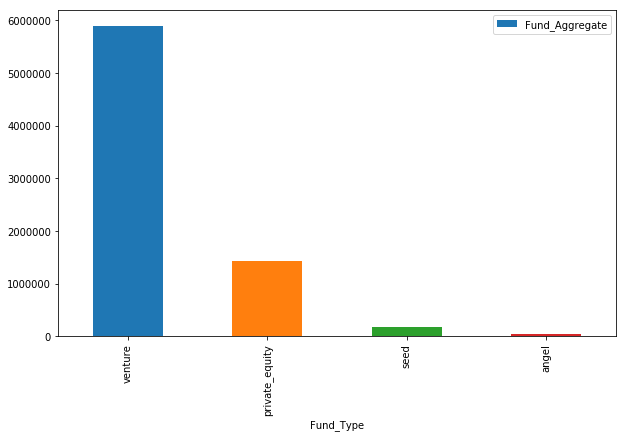

In [50]:
%matplotlib inline

# Increase size of plot
plt.rcParams['figure.figsize'] = (10,6)

#plot dataframe
result.plot.bar(x='Fund_Type',y='Fund_Aggregate')

### A plot showing the top 9 countries against the total amount of investments of funding type FT. 

In [51]:
df = top9.loc[:, ['country_code','raised_amount_usd']]
df = df.groupby('country_code')
ds = df.raised_amount_usd.sum().sort_values(ascending=False)
frame = { 'Country': ds.index, 'Amount': ds.values }
result = pd.DataFrame(frame)
result

Country          Amount
0     USA 108531347515.00
1     GBR   5436843539.00
2     CHN   5016561053.00
3     CAN   3647009578.00
4     IND   2976543602.00
5     ISR   2840305951.00
6     FRA   2112425453.00
7     DEU   1765026223.00
8     SWE    655040681.00

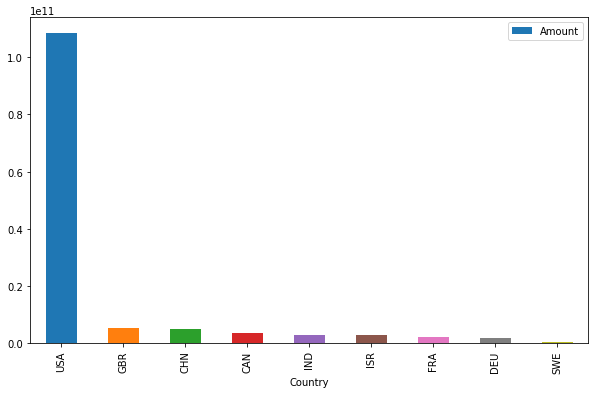

In [52]:
#Make your plot output apear and store in notebook
%matplotlib inline

# Increase size of plot
plt.rcParams['figure.figsize'] = (10,6)

#plot dataframe
result.plot.bar(x='Country',y='Amount')

### A plot showing the number of investments in the top 3 sectors of the top 3 english speaking countries on one chart

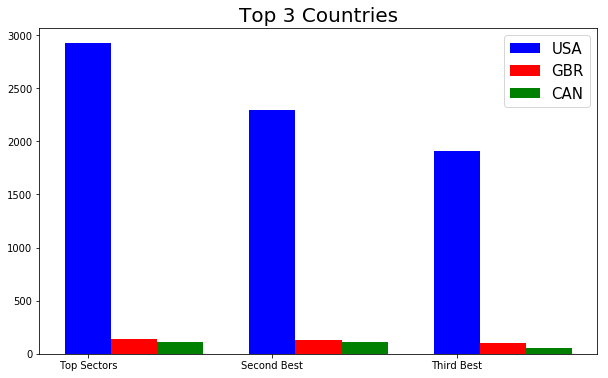

In [53]:
Top3_Count = [D1_ds_count[0:3],D2_ds_count[0:3],D3_ds_count[0:3]]
x = np.arange(3)
Sectors = "Top Sectors", "Second Best", "Third Best"
plt.bar(x + 0.00, Top3_Count[0], color="b", width=0.25,label="USA")
plt.bar(x + 0.25, Top3_Count[1], color="r", width=0.25,label="GBR")
plt.bar(x + 0.50, Top3_Count[2], color="g", width=0.25,label="CAN")
plt.title("Top 3 Countries", fontsize=20)
plt.legend(fontsize=15)
plt.xticks(x, Sectors)
plt.show()